# TekCollection Test Harness  
### Thomas Ales | June 2020  
-----
Testing for TekCollection functionality.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys
import time
sys.path.append('/home/tka/source/visu')
import MapCollection

In [2]:
# Full scan paths
data_dir_prefix = '/home/tka/source/data/customer042/PostFix/'
data_dirs = ['TestScan_000', 'TestScan_020', 'TestScan_040', 'TestScan_060',
             'TestScan_080', 'TestScan_100', 'TestScan_120', 'TestScan_140',
             'TestScan_160']
# Truncated set is 30 rows.
t_data_dir_prefix = '/home/tka/source/data/customer042/PostFix/Cutset/'
t_data_dirs = ['000', '020', '040', '060', '080', '100', '120', '140', '160']


In [3]:
# uncomment these lines to monkey-patch in the truncated dataset.

#data_dir_prefix = t_data_dir_prefix
#data_dirs = t_data_dirs

In [4]:
# build absolute path list
abspathlist = []
for current in data_dirs:
    abspathlist.append(data_dir_prefix + current)
# initalize the collection object
test_mc = MapCollection.TekCollection()

# append maps as if the GUI would
for idx, current in enumerate(abspathlist):
    test_mc.initalize_data(current, idx)

Found 180 & 180 DC / RF Files
Found 180 & 180 DC / RF Files
Found 180 & 180 DC / RF Files
Found 180 & 180 DC / RF Files
Found 180 & 180 DC / RF Files
Found 180 & 180 DC / RF Files
Found 180 & 180 DC / RF Files
Found 180 & 180 DC / RF Files
Found 180 & 180 DC / RF Files


4-t execution: 3.13417s


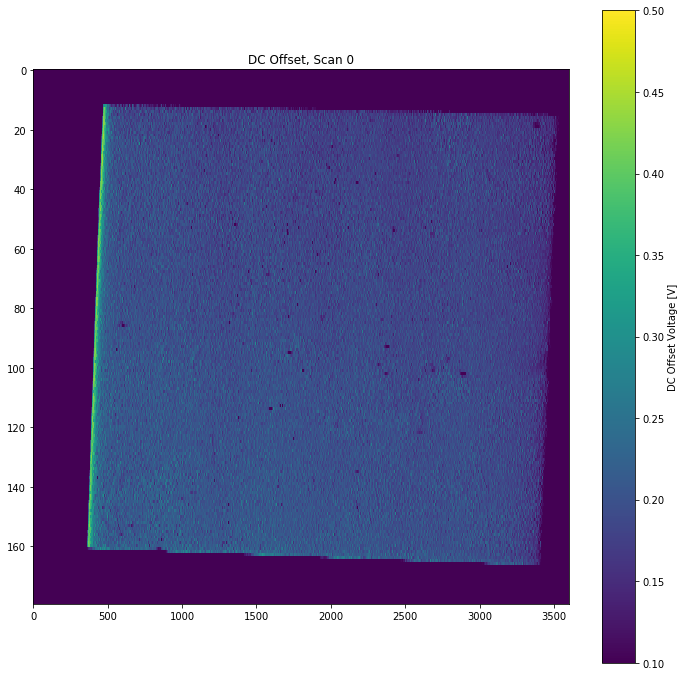

In [5]:
s1 = time.time()
test_mc.process_dc(0)
s2 = time.time()
#test_mc.process_dc(0, 12)
#s3 = time.time()
#test = pickle.load(open('/home/tka/source/data/voltage_test_data.p', 'rb'))
print("4-t execution: {0:.5f}s".format(s2-s1))
#print("24-t execution: {0:.5f}s".format(s3-s2))
plt.figure(figsize=[12, 12])
plt.title("DC Offset, Scan 0")
plt.imshow(test_mc.scans[0].dc_map, aspect=3601/180)
dcbar = plt.colorbar()
plt.clim(0.100, 0.500)
dcbar.set_label("DC Offset Voltage [V]")

In [6]:
#s4 = time.time()
#test_mc.process_fft(0)
#s5 = time.time()
#test_mc.process_fft(0, 12)
#6 = time.time()
#print("1x FFT Execution Time (4-t): {0:.4f} seconds.".format(s5-s4))
#print("1x FFTExecution Time (12-t): {0:.4f} seconds.".format(s6-s5))
#test = pickle.load(open('/home/tka/source/data/fft_test_data.p', 'rb'))
#for idx, current in enumerate(test):
    #mc.map_collections[idx].rf_map = current

In [7]:
s7 = time.time()
for idx in range(0,test_mc.scans.__len__()):
    test_mc.process_dc(idx, 2)
    test_mc.process_fft(idx, 8)
s8 = time.time()
print("9 Angle Total Execution Time (12-t): {0:.4f} seconds.".format(s8-s7))

9 Angle Total Execution Time (12-t): 138.4227 seconds.


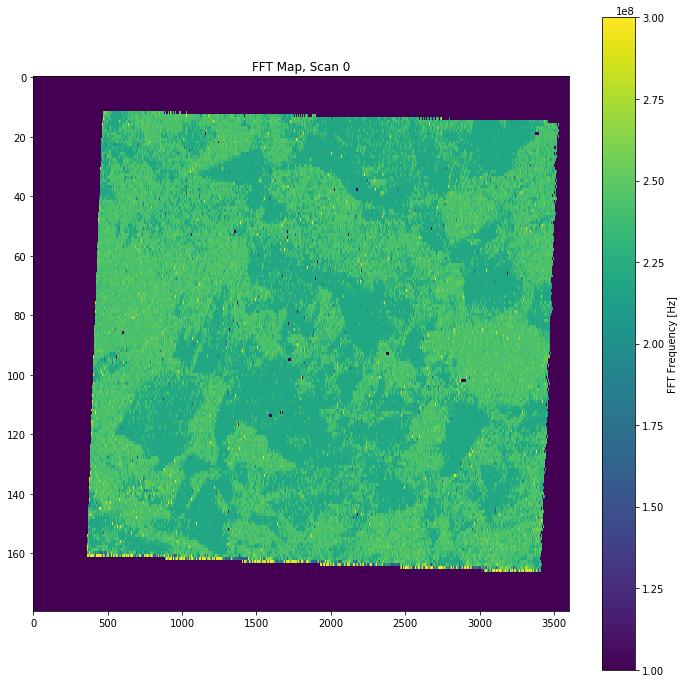

In [8]:
# FFT Test Code
plt.figure(figsize=[12, 12])
plt.imshow(test_mc.scans[0].rf_map, aspect=3601/180)
plt.clim(100E6, 300E6)
rfbar = plt.colorbar()
plt.title("FFT Map, Scan 0")
rfbar.set_label(r"FFT Frequency [Hz]")

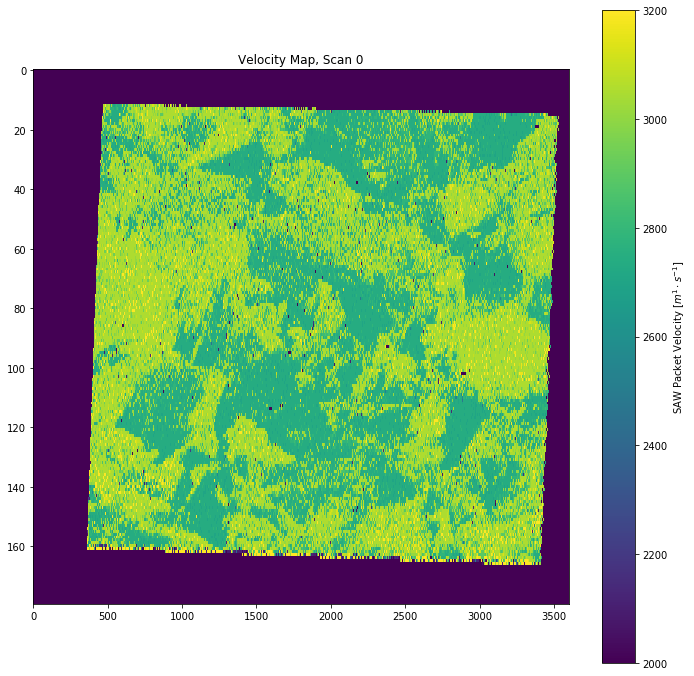

In [9]:
for idx in range(0, 9):
    test_mc.scans[idx].mp_assemble_velocitymap()
plt.figure(figsize=[12,12])
plt.imshow(test_mc.scans[0].velocity_map, aspect=3601/180)
plt.clim(2000, 3200)
vcbar = plt.colorbar()
plt.title("Velocity Map, Scan 0")
vcbar.set_label(r"SAW Packet Velocity [$m^{1} \cdot s^{-1}$]")

In [10]:
# let's try making a numpy array
# 180 rows, 3601 points, 9 scans

map_collection = np.ndarray(shape=(180,3601,9))
for current in range(0,9):
    map_collection[:,:,current] = test_mc.scans[current].velocity_map
    

In [70]:
angles = [0, 20, 40, 60, 80, 100, 120, 140, 160]

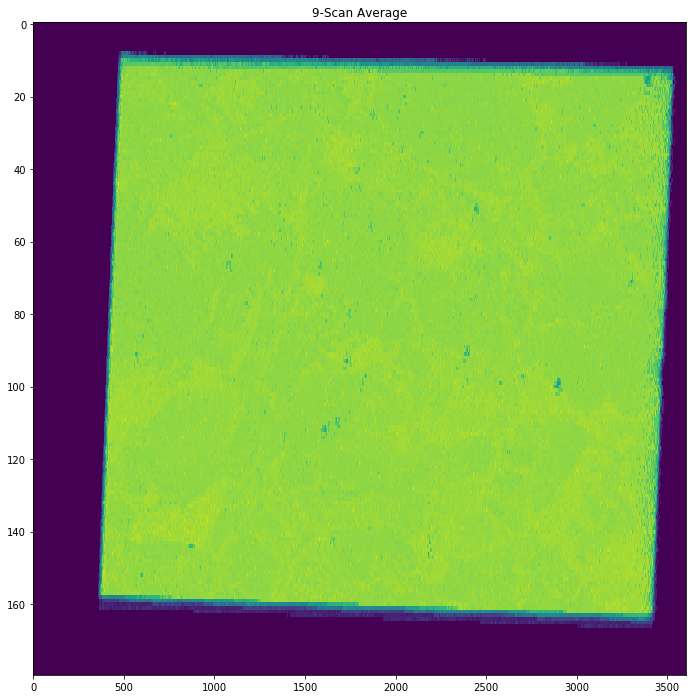

In [71]:
average_map = map_collection.mean(axis=2)
average_map.shape
plt.figure(figsize=[12, 12])
plt.title("9-Scan Average")
plt.imshow(average_map, aspect=3601/180)

In [72]:
interpolated_velocitymap = np.ndarray(shape=(180, 3601, 181))

In [73]:
test_mc.scans[1].velocity_map.loc[15,2000]

3050.268423621279

In [74]:
# Place angles in array z dimension and interpolate
for idx, current in enumerate(angles):
    _temp = test_mc.scans[idx].velocity_map.to_numpy()
    interpolated_velocitymap[:,:,int(current)] = _temp

In [75]:
interpangles = [x for x in range(0, 181)]
for row in range(0, interpolated_velocitymap.shape[0]):
    for column in range(0, interpolated_velocitymap.shape[1]):
        _velocities = []
        for angle in range(0, 9):
            _velocities.append(test_mc.scans[angle].velocity_map.iloc[row,column])
            
        _interp = np.interp(interpangles, angles, _velocities)
        interpolated_velocitymap[row,column,:] = _interp


In [76]:
interpolated_velocitymap[15,2000,:]

array([2745.24158126, 2760.49292338, 2775.7442655 , 2790.99560761,
       2806.24694973, 2821.49829185, 2836.74963397, 2852.00097609,
       2867.2523182 , 2882.50366032, 2897.75500244, 2913.00634456,
       2928.25768668, 2943.50902879, 2958.76037091, 2974.01171303,
       2989.26305515, 3004.51439727, 3019.76573939, 3035.0170815 ,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842362,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842362,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842362,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842362,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842362,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842362,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842362,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842362,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842362,
       3050.26842362, 3050.26842362, 3050.26842362, 3050.26842

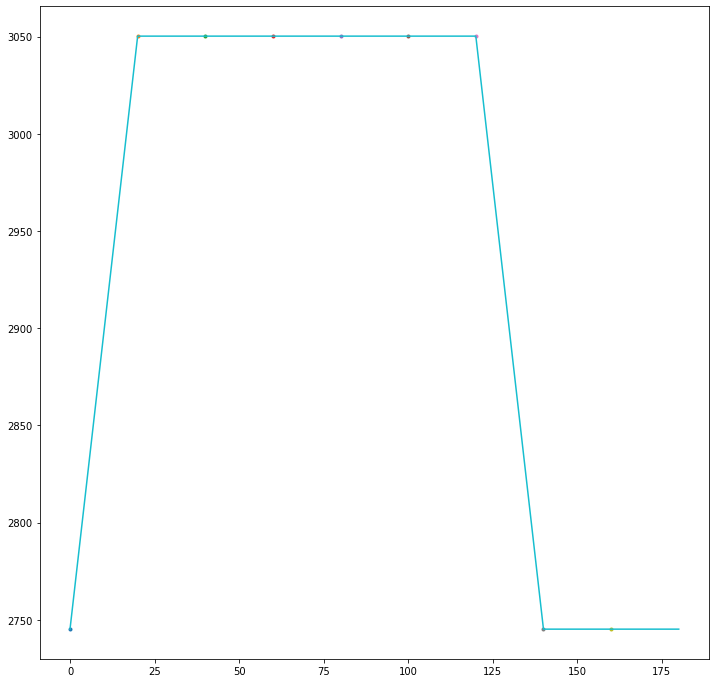

In [80]:
plt.figure(figsize=[12,12])
for idx, current in enumerate(angles):
    plt.plot(current, test_mc.scans[idx].velocity_map.iloc[15,2000], '.')
plt.plot(interpangles, interpolated_velocitymap[15, 2000, :])